In [46]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
import lightgbm as lgb
from sklearn.model_selection import StratifiedKFold

In [47]:
df=pd.read_csv("E:/dataset/abalone.csv")

In [48]:
from sklearn.model_selection import train_test_split

# df 데이터를 8:2로 나누기
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

# df_train과 df_test를 확인할 수 있습니다.
print("Training data size:", df_train.shape)
print("Test data size:", df_test.shape)


Training data size: (3341, 10)
Test data size: (836, 10)


In [49]:
df_train.head()

,id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
4038,4038,I,0.550,0.445,0.125,0.6720,0.2880,0.1365,0.210,11
1272,1272,I,0.475,0.355,0.100,0.5035,0.2535,0.0910,0.140,8
3384,3384,F,0.305,0.225,0.070,0.1485,0.0585,0.0335,0.045,7
3160,3160,I,0.275,0.200,0.065,0.1165,0.0565,0.0130,0.035,7
3894,3894,M,0.495,0.380,0.135,0.6295,0.2630,0.1425,0.215,12


In [50]:
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
Index: 3341 entries, 4038 to 860
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              3341 non-null   int64  
 1   Sex             3341 non-null   object 
 2   Length          3341 non-null   float64
 3   Diameter        3341 non-null   float64
 4   Height          3341 non-null   float64
 5   Whole_weight    3341 non-null   float64
 6   Shucked_weight  3341 non-null   float64
 7   Viscera_weight  3341 non-null   float64
 8   Shell_weight    3341 non-null   float64
 9   Rings           3341 non-null   int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 287.1+ KB
None


Shucked_weight =  Whole weight.1
Viscera_weight =  Whole weight.2

In [51]:
df_train.describe()

,id,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
count,3341.000000,3341.000000,3341.000000,3341.000000,3341.000000,3341.000000,3341.000000,3341.000000,3341.000000
mean,2116.754565,0.524964,0.408518,0.139790,0.830838,0.360561,0.180832,0.239682,9.944627
std,1202.682792,0.119137,0.098687,0.042514,0.491583,0.223018,0.109444,0.139941,3.207344
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,1078.000000,0.450000,0.350000,0.115000,0.443000,0.186500,0.093000,0.130000,8.000000
50%,2121.000000,0.545000,0.425000,0.140000,0.802000,0.337000,0.171000,0.234000,9.000000
75%,3163.000000,0.615000,0.480000,0.165000,1.151000,0.503500,0.253500,0.328500,11.000000
max,4175.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [52]:
def plot_numerics(data):
    numeric_columns = data.columns
    # Plotting histograms and box plots for each numeric column
    for column in numeric_columns:
        _, ax = plt.subplots(1,2, figsize=(16, 5))
        ax=ax.flatten()

        # Histogram
        sns.histplot(data[column], bins=50, kde=True, color='skyblue', ax=ax[0])
        ax[0].set_title(f'Histogram of {column}', fontsize=15,fontweight='bold')
        ax[0].set_xlabel(column, fontsize=12)
        ax[0].set_ylabel('Frequency', fontsize=12)

        # Box plot
        sns.boxplot(x=data[column], color='lightgreen', ax=ax[1])
        ax[1].set_title(f'Box plot of {column}', fontsize=15,fontweight='bold')
        ax[1].set_xlabel(column, fontsize=12)

        plt.tight_layout()
        plt.show()
        
def get_count_plot(cat):
    ax=sns.countplot(x=df_train[cat],
                   order=df_train[cat].value_counts(ascending=False).index);
        
    abs_values = df_train[cat].value_counts(ascending=False)
    rel_values = df_train[cat].value_counts(ascending=False, normalize=True).values * 100
    lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]

    ax.bar_label(container=ax.containers[0], labels=lbls)
    ax.set_title("Distribution of "+cat+" Values",fontsize=16)

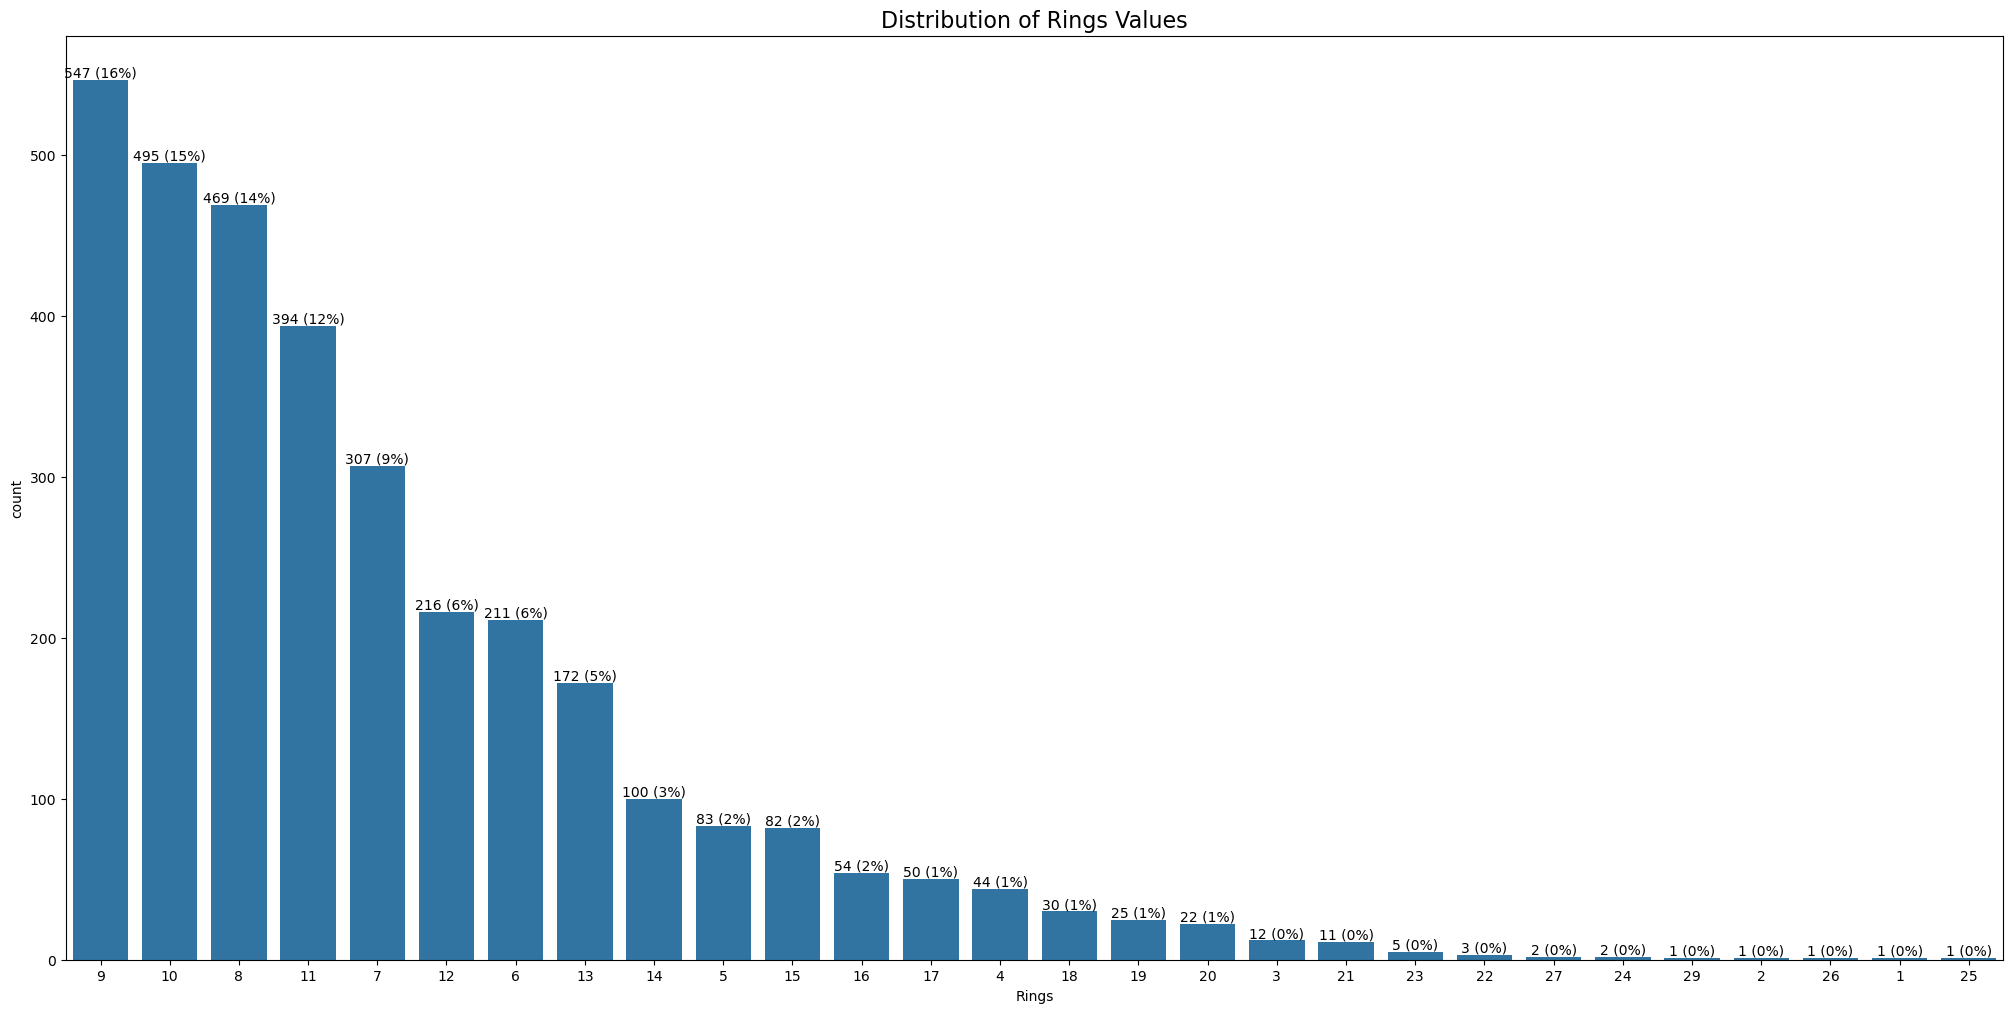

In [53]:
plt.figure(figsize=(25, 12))
get_count_plot('Rings')

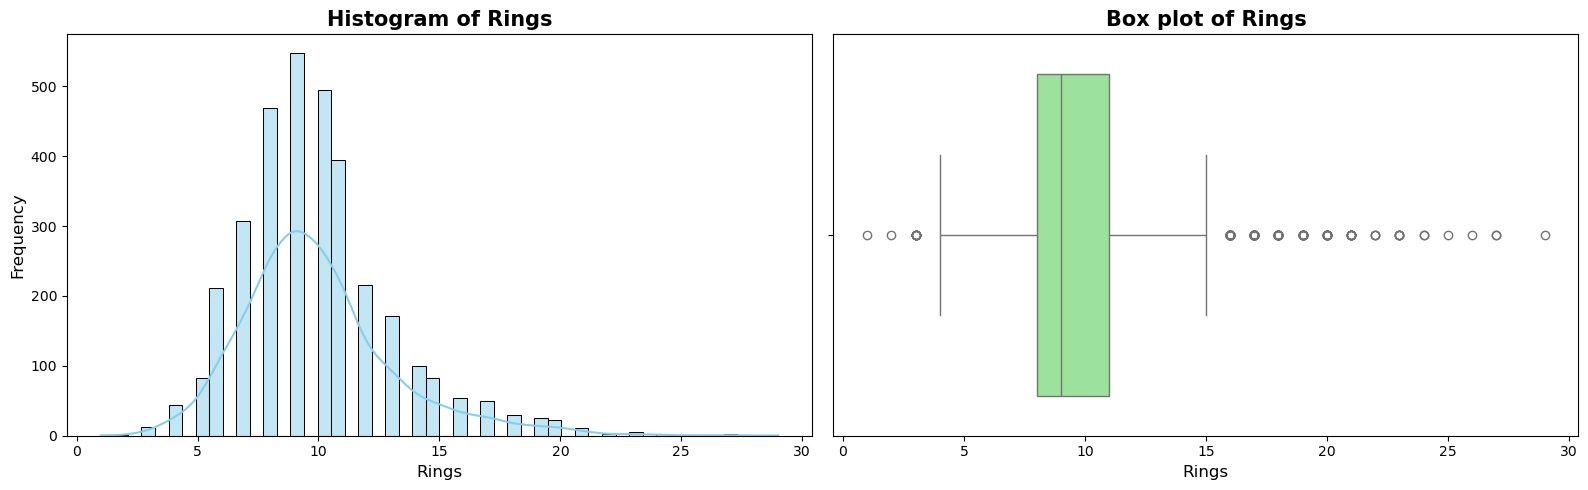

In [54]:
plot_numerics(df_train[['Rings']])


In [55]:
df_train.columns

Index(['id', 'Sex', 'Length', 'Diameter', 'Height', 'Whole_weight',
       'Shucked_weight', 'Viscera_weight', 'Shell_weight', 'Rings'],
      dtype='object')

In [56]:
df_train["Whole weight Ratio"] = df_train["Shucked_weight"] / df_train["Whole_weight"]

In [57]:
df_train

,id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Whole weight Ratio
4038,4038,I,0.550,0.445,0.125,0.6720,0.2880,0.1365,0.210,11,0.428571
1272,1272,I,0.475,0.355,0.100,0.5035,0.2535,0.0910,0.140,8,0.503476
3384,3384,F,0.305,0.225,0.070,0.1485,0.0585,0.0335,0.045,7,0.393939
3160,3160,I,0.275,0.200,0.065,0.1165,0.0565,0.0130,0.035,7,0.484979
3894,3894,M,0.495,0.380,0.135,0.6295,0.2630,0.1425,0.215,12,0.417792
...,...,...,...,...,...,...,...,...,...,...,...
3444,3444,F,0.490,0.400,0.115,0.5690,0.2560,0.1325,0.145,9,0.449912
466,466,F,0.670,0.550,0.190,1.3905,0.5425,0.3035,0.400,12,0.390147
3092,3092,M,0.510,0.395,0.125,0.5805,0.2440,0.1335,0.188,11,0.420327
3772,3772,M,0.575,0.465,0.120,1.0535,0.5160,0.2185,0.235,9,0.489796


In [58]:
cat_cols=['Sex']
num_cols=['Length', 'Diameter', 'Height', 
             'Whole_weight','Shucked_weight', 
             'Viscera_weight', 'Shell_weight', "Whole weight Ratio"]

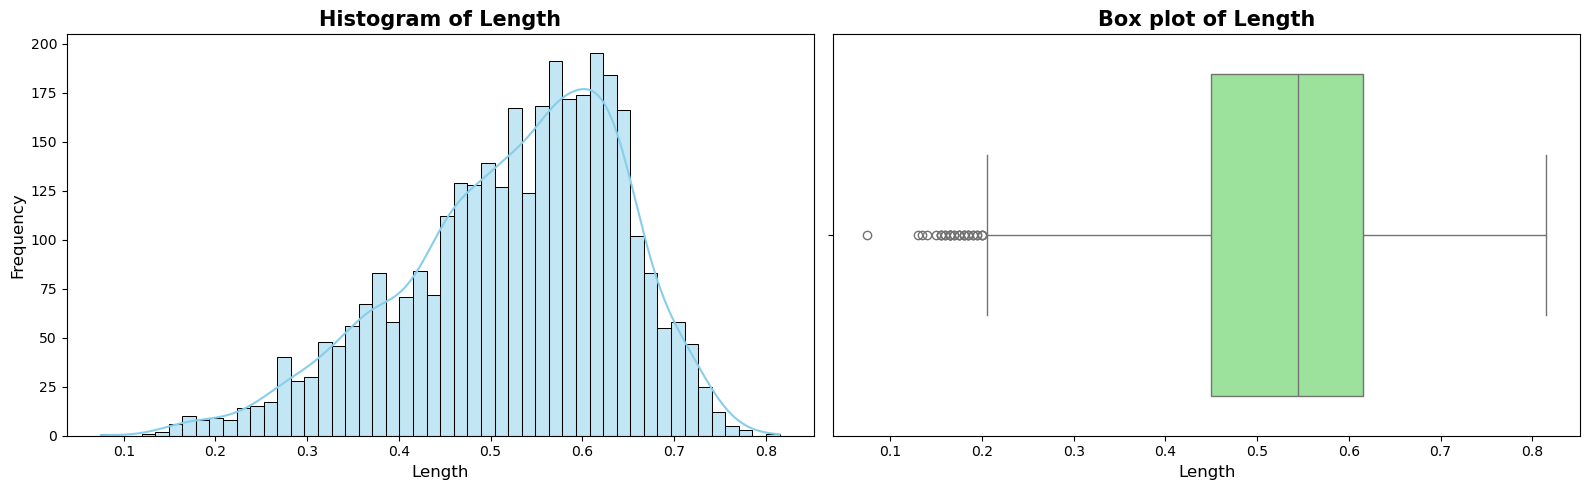

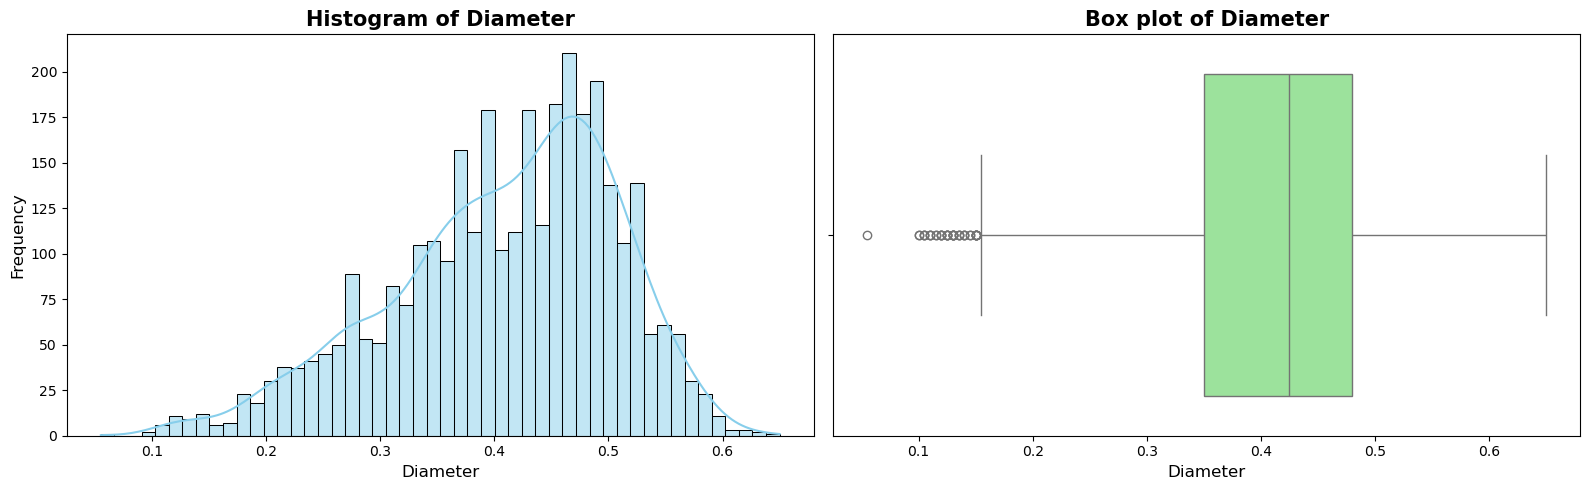

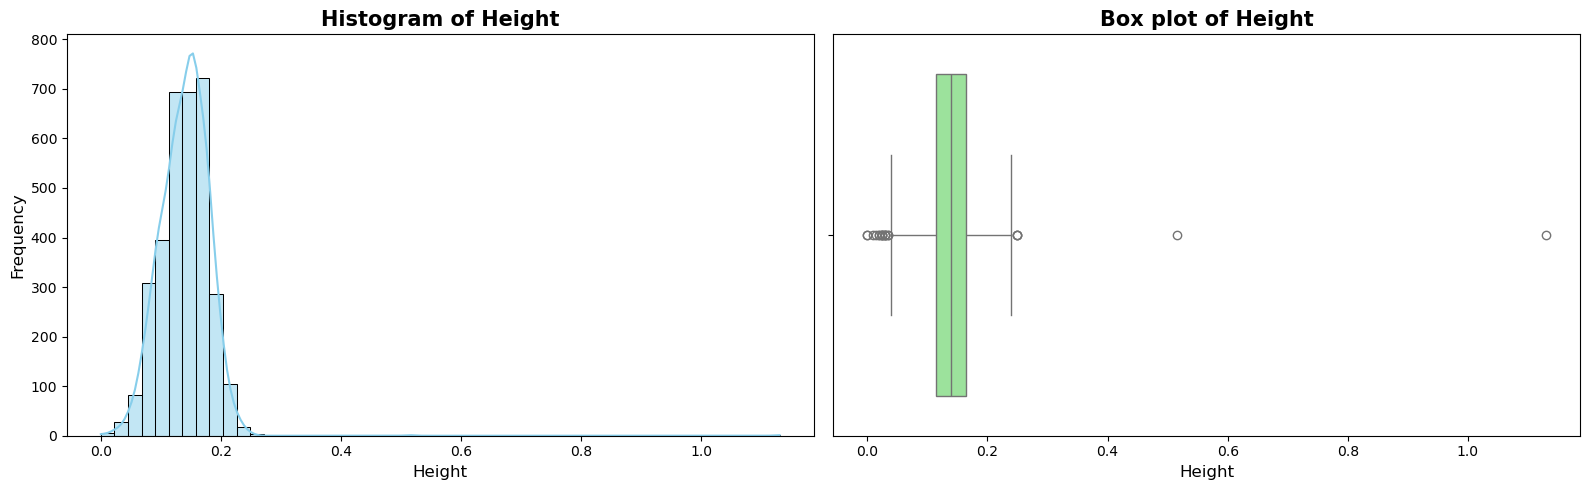

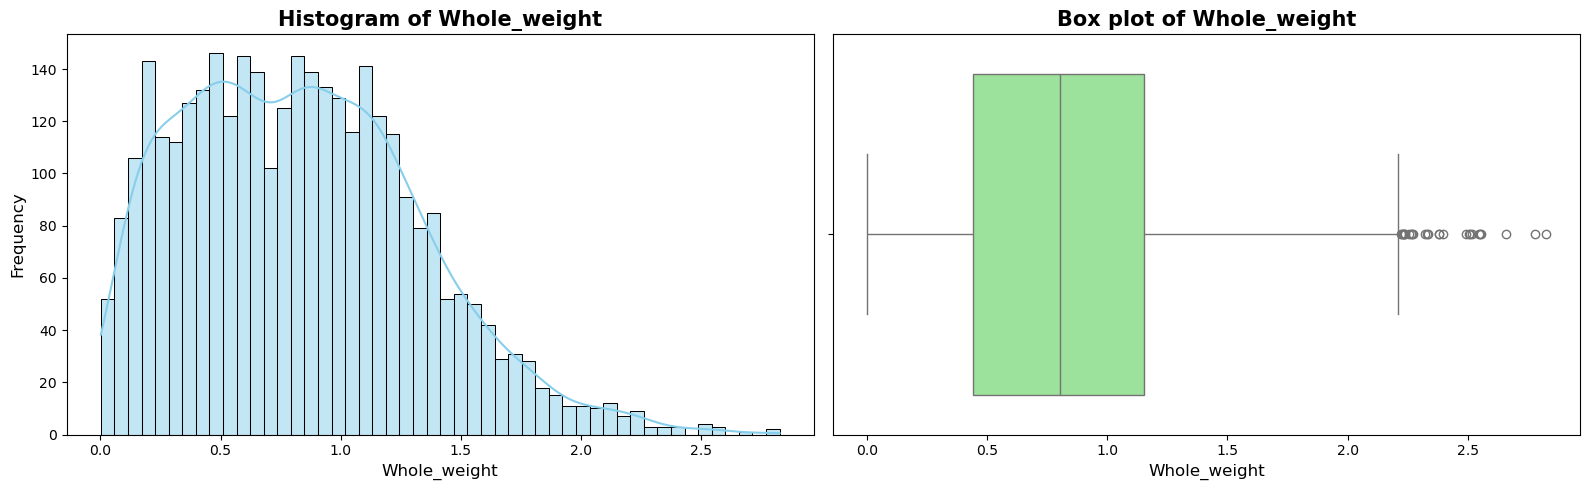

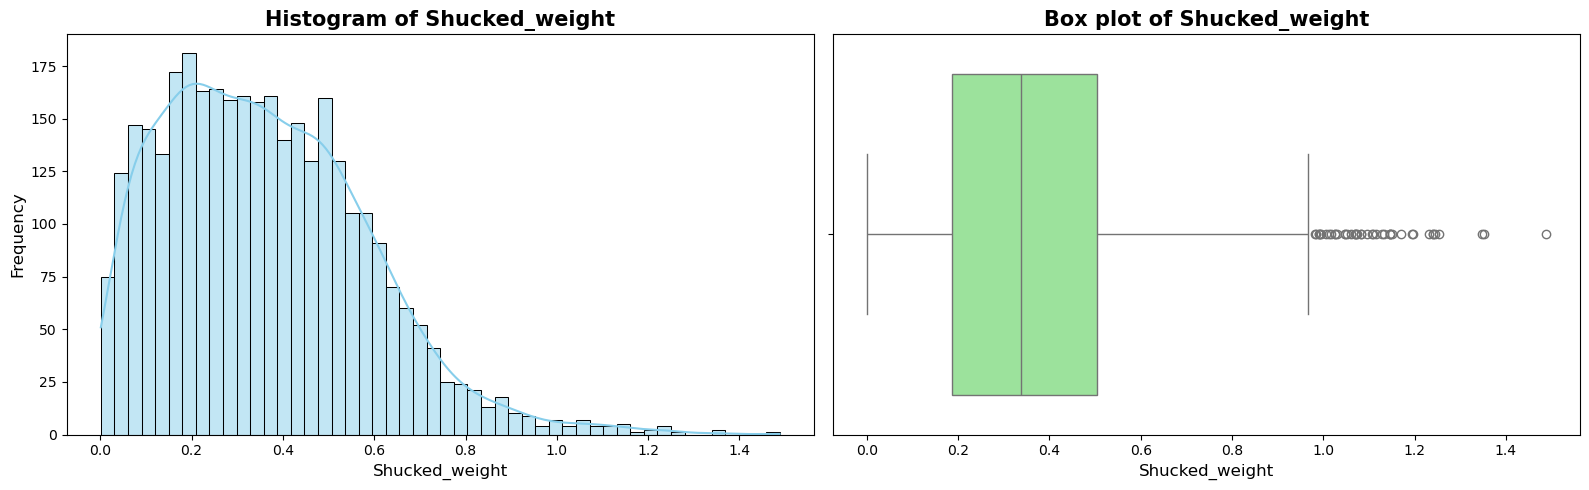

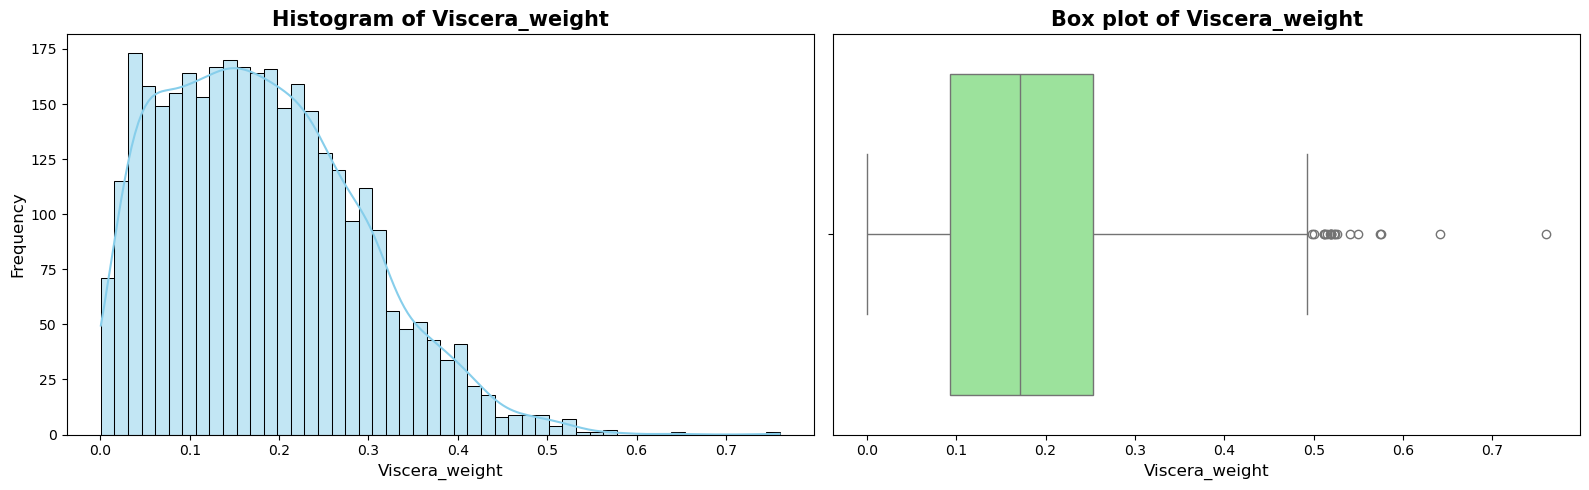

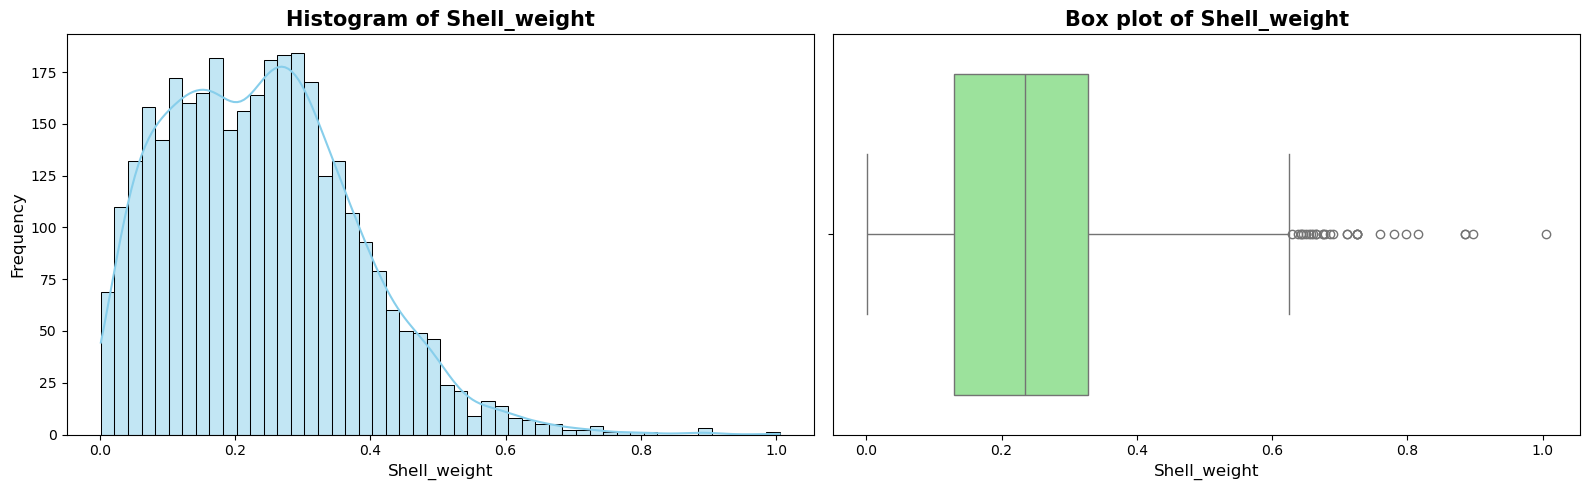

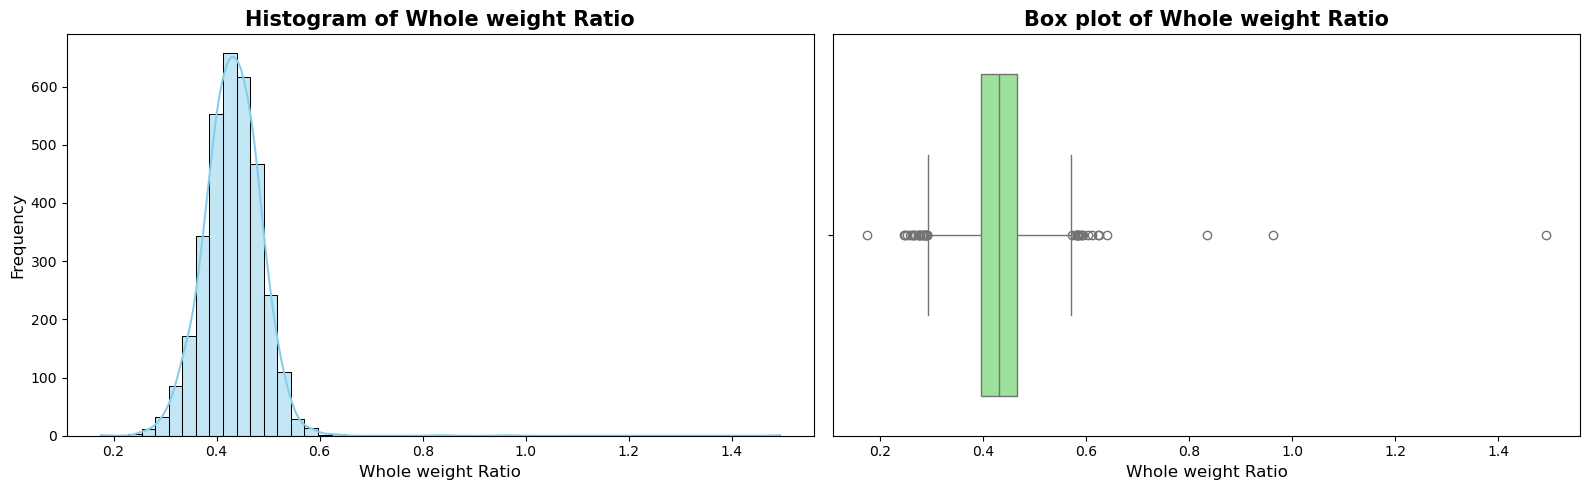

In [59]:
plot_numerics(df_train[num_cols])

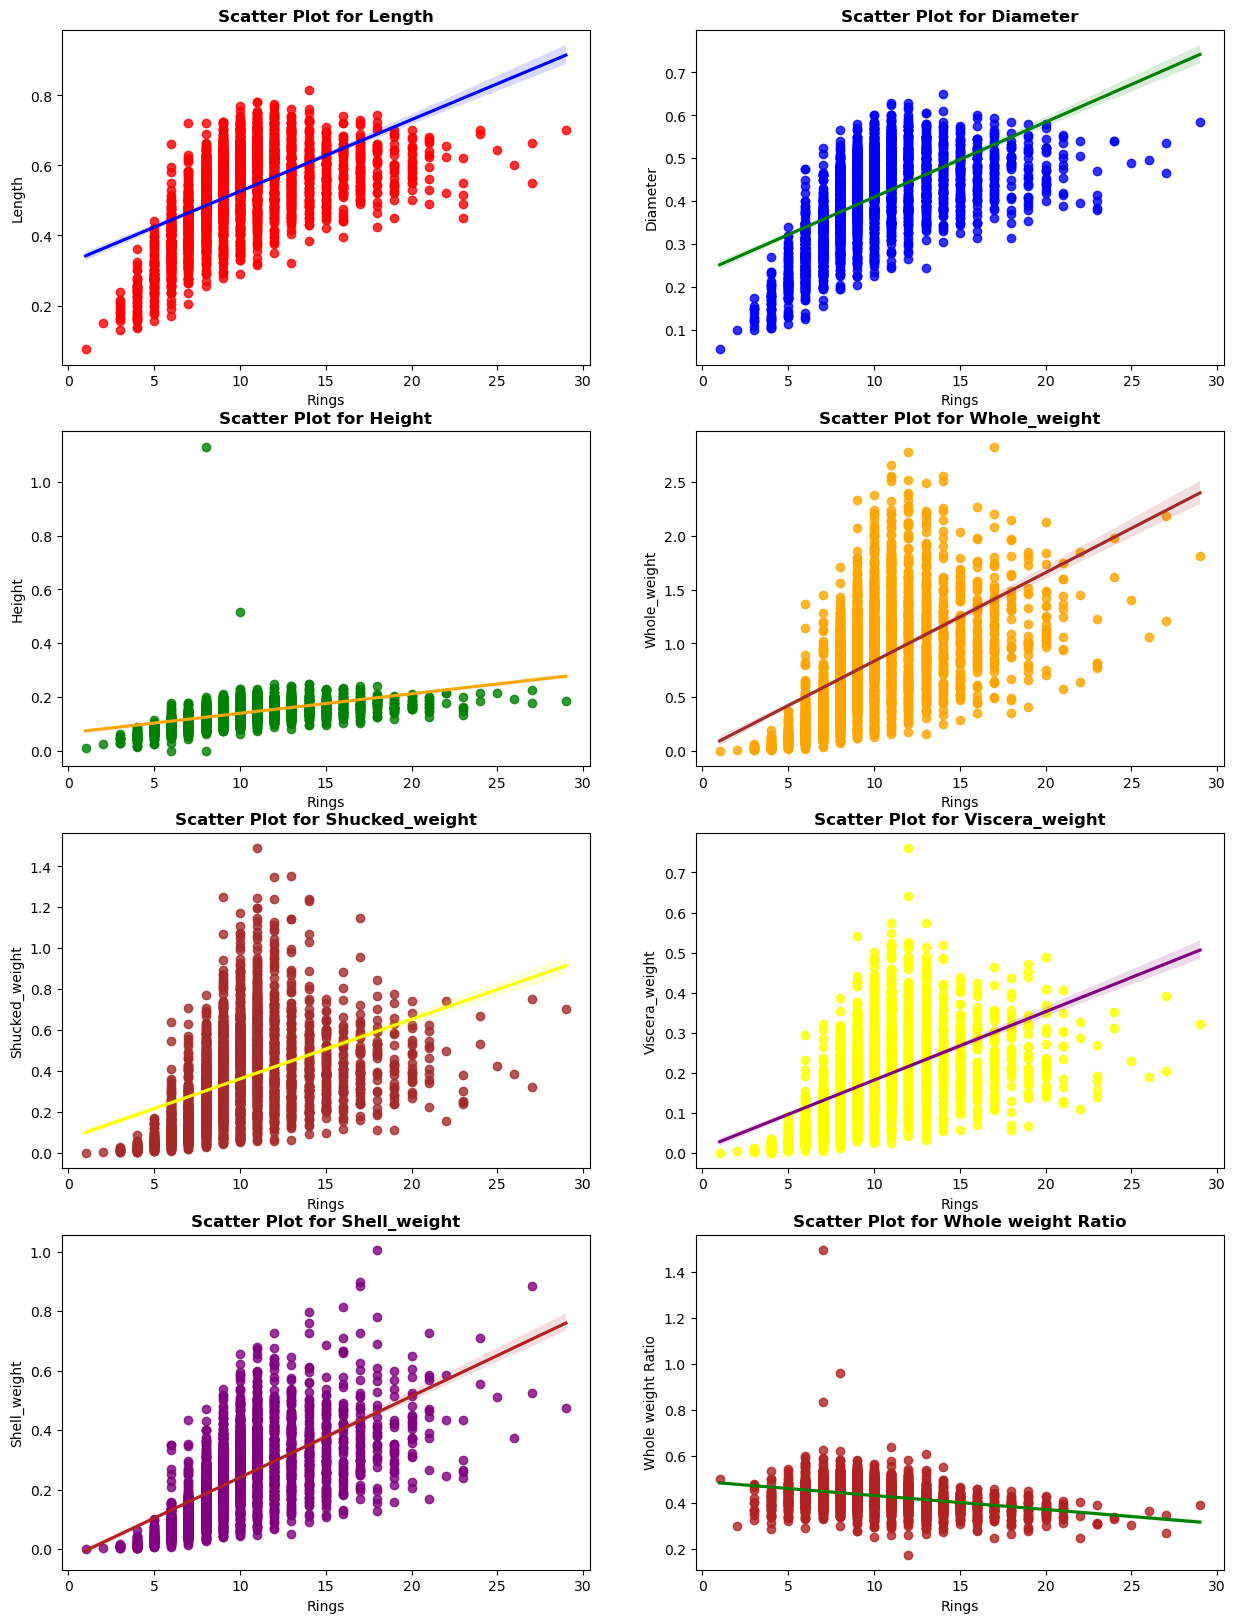

In [60]:
# Determine the size of the grid
n_cols = 2  # Number of columns in the subplot grid
n_rows = int(np.ceil(len(num_cols) / n_cols))  # Calculate the number of rows needed
#
fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axs = axs.flatten() if n_rows > 1 else [axs]
#
colors=['red','blue','green','orange','brown','yellow','purple','firebrick','green']
for i, ncol in enumerate(num_cols):
    sns.regplot(data=df_train, x="Rings", y=ncol, ax=axs[i],
                color=colors[i],line_kws=dict(color=colors[i+1]))
    axs[i].set_title(f'Scatter Plot for {ncol}',fontweight='bold')


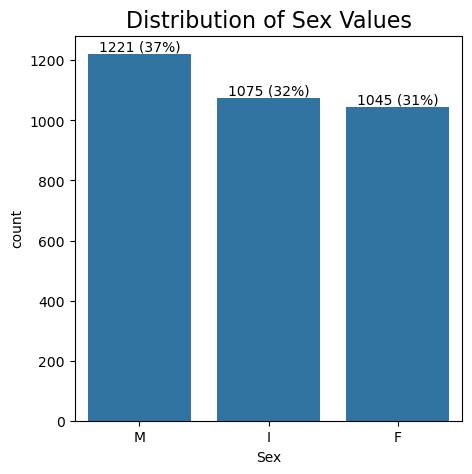

In [61]:
plt.figure(figsize=(5, 5))
get_count_plot('Sex')

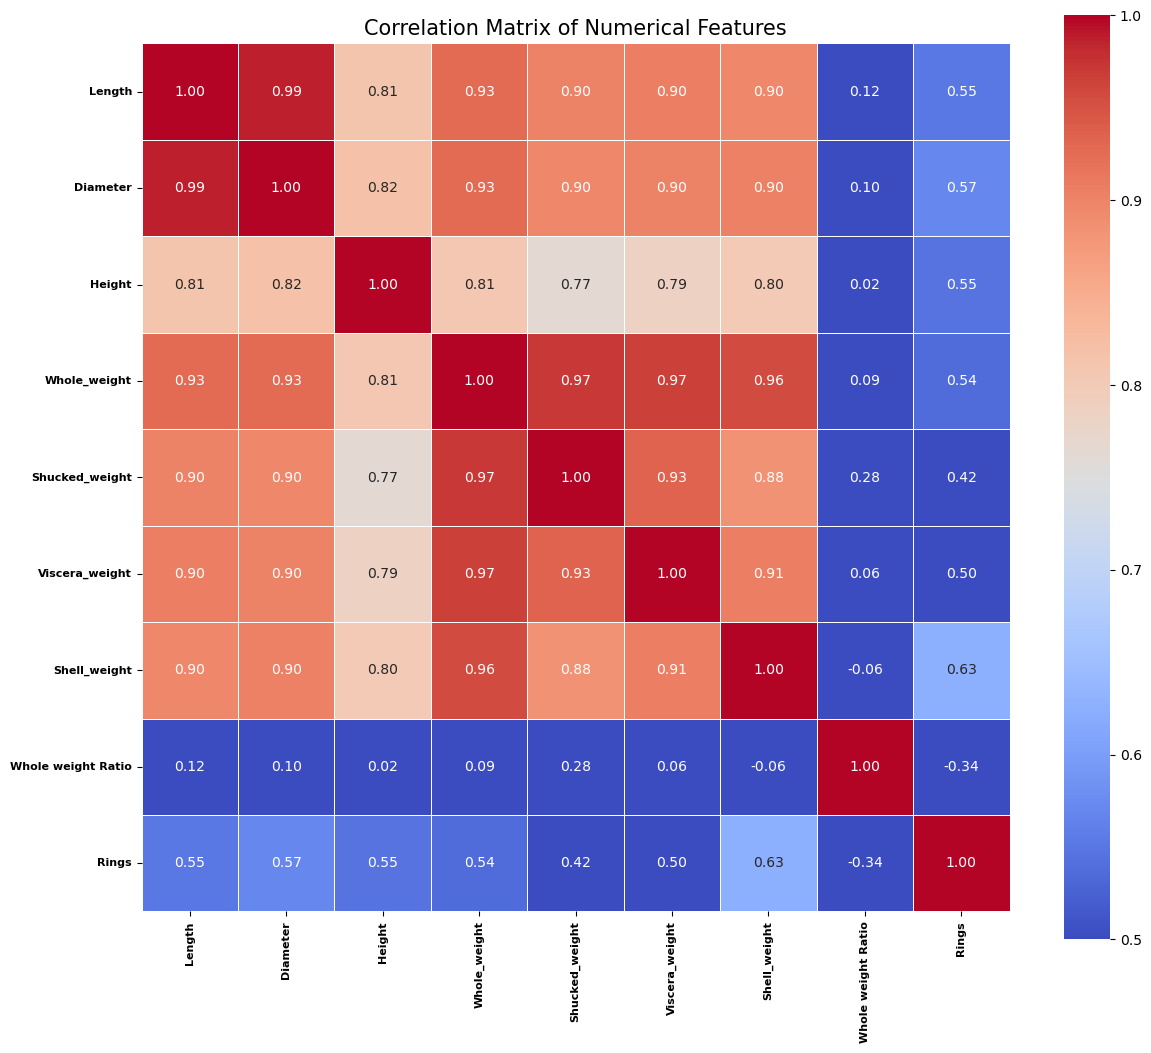

In [62]:
corr_matrix = df_train[num_cols+['Rings']].corr()
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, vmax=1, vmin=0.5, center=0.75,annot=True, fmt=".2f", square=True, 
            linewidths=.5, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features', fontsize=15)
plt.xticks(fontsize=8,fontweight='bold')
plt.yticks(fontsize=8,fontweight='bold')
plt.show()

In [63]:
num_cols=['Length','Diameter','Height',"Whole weight Ratio"]

In [64]:
def getFeats(df):
    
    df["Whole weight Ratio"]=df["Shucked_weight"]/df["Whole_weight"]
    df["Shell_weight"]=np.log(0.00001+df["Shell_weight"])
    df["Whole_weight"]=np.log(0.00001+df["Whole_weight"])
    df["Shucked_weight"]=np.log(0.00001+df["Shucked_weight"])
    df["Viscera_weight"]=np.log(0.00001+df["Viscera_weight"])
    
    sex_dict={'I':0,'M':1,'F':2}
    df['Sex']=df['Sex'].map(sex_dict)
    
    scaler = StandardScaler()
    df[num_cols] = scaler.fit_transform(df[num_cols])
    
    return df

In [65]:
df_train['typ']=0
df_test['typ']=1
#
df_all=pd.concat([df_train,df_test],axis=0)
df_all=getFeats(df_all)
df_all.head()

,id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Whole weight Ratio,typ
4038,4038,0,0.216591,0.374075,-0.347099,-0.397482,-1.244760,-1.991357,-1.560600,11,-0.036338,0
1272,1272,0,-0.408000,-0.532927,-0.944870,-0.686152,-1.372352,-2.396786,-1.966041,8,0.671962,0
3384,3384,2,-1.823741,-1.843041,-1.662195,-1.907103,-2.838558,-3.395911,-3.100871,7,-0.363821,0
3160,3160,0,-2.073577,-2.094986,-1.781749,-2.149778,-2.873338,-4.342037,-3.352122,7,0.497052,0
3894,3894,1,-0.241443,-0.280982,-0.107991,-0.462814,-1.335563,-1.948343,-1.537071,12,-0.138270,0


In [71]:
df_train=df_all[df_all['typ']==0]
df_test=df_all[df_all['typ']==1]
#
X=df_train.drop(['id','Rings','typ'],axis=1)
#
y1=df_train['Rings']
y=np.log(1+y1)
#
feats=list(X.columns)

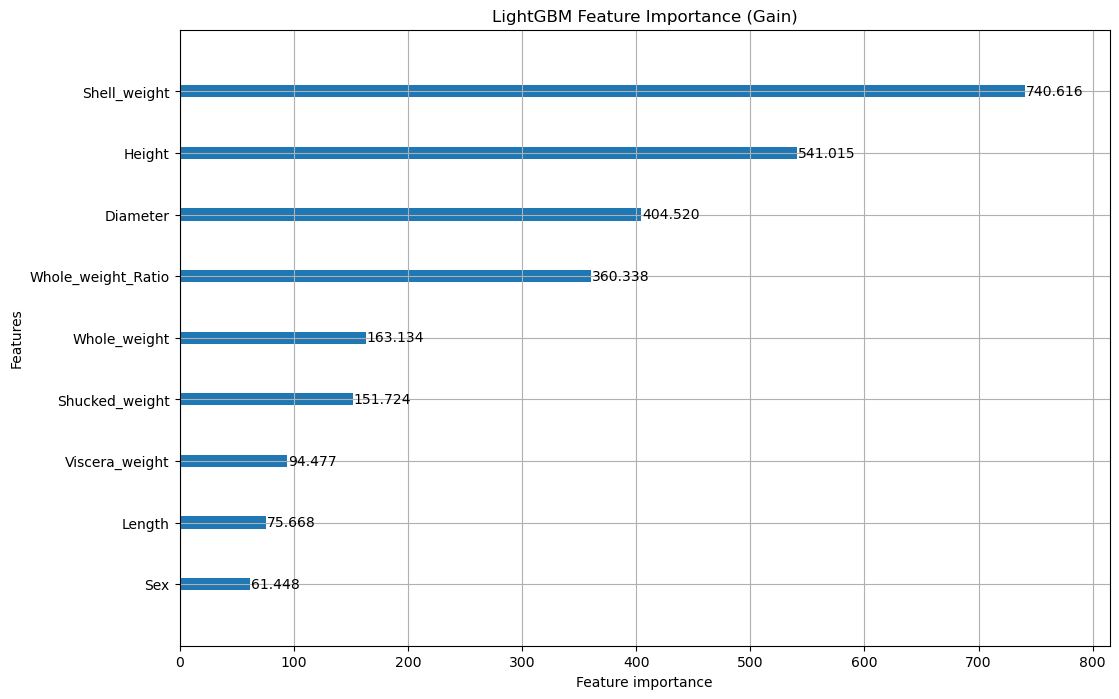

In [72]:
params={'metric':'rmse',
        'verbosity':-1,
        'n_estimators': 600, 
        'learning_rate': 0.04354995869675832, 
        'subsample': 0.719764026033712,
        'colsample_bytree': 0.5593947251633323, 
        'min_data_in_leaf': 71, 
        'lambda_l1': 0.014080963948076265, 
        'lambda_l2': 0.04806381049807052,
        'max_depth': 16, 
        'min_child_samples': 34}
#
LGB=lgb.LGBMRegressor(**params)
LGB.fit(X,y)
#
lgb.plot_importance(LGB, importance_type="gain", figsize=(12,8), max_num_features=12,
                    title="LightGBM Feature Importance (Gain)")
plt.show()

In [79]:
# 예측값 계산
y_pred = LGB.predict(X)

# MSE (Mean Squared Error) 계산
mse = mean_squared_error(y, y_pred)

# MSE 출력
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 0.014888830526709657
